In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My\ Drive

/content/drive/My Drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model
from keras import backend as K
import os
import cv2
from keras.models import load_model

Using TensorFlow backend.


In [0]:
labels= ['female', 'male', 'malestaff']
dataset = '/content/drive/My Drive/faces94/'
progress = 0
X_train = []
for label in labels:
    label_path = os.path.join(dataset, label)
    persons = os.listdir(label_path)
    for person in persons:
        person_path = os.path.join(label_path,person)
        images = os.listdir(person_path)
        for image in images:
            if(image.split('.')[-1] != 'jpg'):
                continue
            image = os.path.join(person_path,image)
            X_train.append(cv2.resize(cv2.imread(image),(128,128))/255)
        progress += 1
        #print(progress)
        
X_train = np.stack(X_train)
print(X_train.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

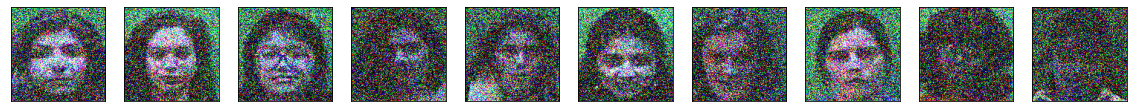

In [0]:
noise_factor = 0.5
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)


n = 10
plt.figure(figsize=(20,2))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_train_noisy[i].reshape(128,128,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig('ordata101.png')

In [0]:
input_img = Input(shape=(128,128,3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
encoded = Dense(100, activation='relu')(x)
x = Dense(32*32*3)(x)
x = Reshape((32,32,3))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
encoder = Model(input_img,encoded)
autoencoder = Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 3072)              1006

In [0]:
history = autoencoder.fit(x_train_noisy, X_train, epochs=100, batch_size=128, shuffle=True, validation_split=0.2)

Train on 2455 samples, validate on 614 samples
Epoch 1/100
2455/2455 [==============================] - 10s 4ms/step - loss: 0.6118 - val_loss: 0.5972
Epoch 2/100
2455/2455 [==============================] - 3s 1ms/step - loss: 0.5627 - val_loss: 0.5649
Epoch 3/100
2455/2455 [==============================] - 3s 1ms/step - loss: 0.5448 - val_loss: 0.5579
Epoch 4/100
2455/2455 [==============================] - 3s 1ms/step - loss: 0.5378 - val_loss: 0.5546
Epoch 5/100
2455/2455 [==============================] - 3s 1ms/step - loss: 0.5337 - val_loss: 0.5525
Epoch 6/100
2455/2455 [==============================] - 3s 1ms/step - loss: 0.5307 - val_loss: 0.5516
Epoch 7/100
2455/2455 [==============================] - 3s 1ms/step - loss: 0.5286 - val_loss: 0.5510
Epoch 8/100
2455/2455 [==============================] - 3s 1ms/step - loss: 0.5271 - val_loss: 0.5500
Epoch 9/100
2455/2455 [==============================] - 3s 1ms/step - loss: 0.5260 - val_loss: 0.5497
Epoch 10/100
2455/2455 [=

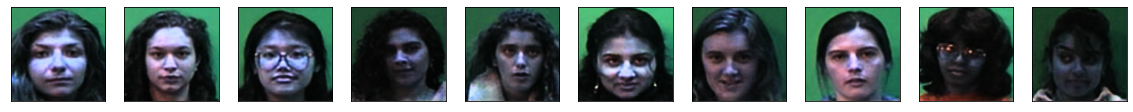

In [0]:
n = 10
plt.figure(figsize=(20,2))
x_test_output = autoencoder.predict(x_train_noisy)
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_output[i].reshape(128,128,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig('image11.png')
autoencoder.save('autoencoder.h5')

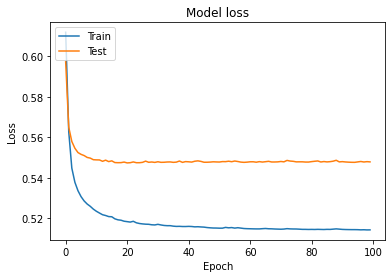

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()